<a href="https://colab.research.google.com/github/Delgusho/scientific-computing/blob/main/scientific%20computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import norm


In [30]:
# Loading the dataset 
url='https://raw.githubusercontent.com/Delgusho/scientific-computing/main/housing.csv'
df=pd.read_csv(url,encoding='unicode_escape')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.corr()

<ipython-input-4-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<ipython-input-31-bd263b57df3b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


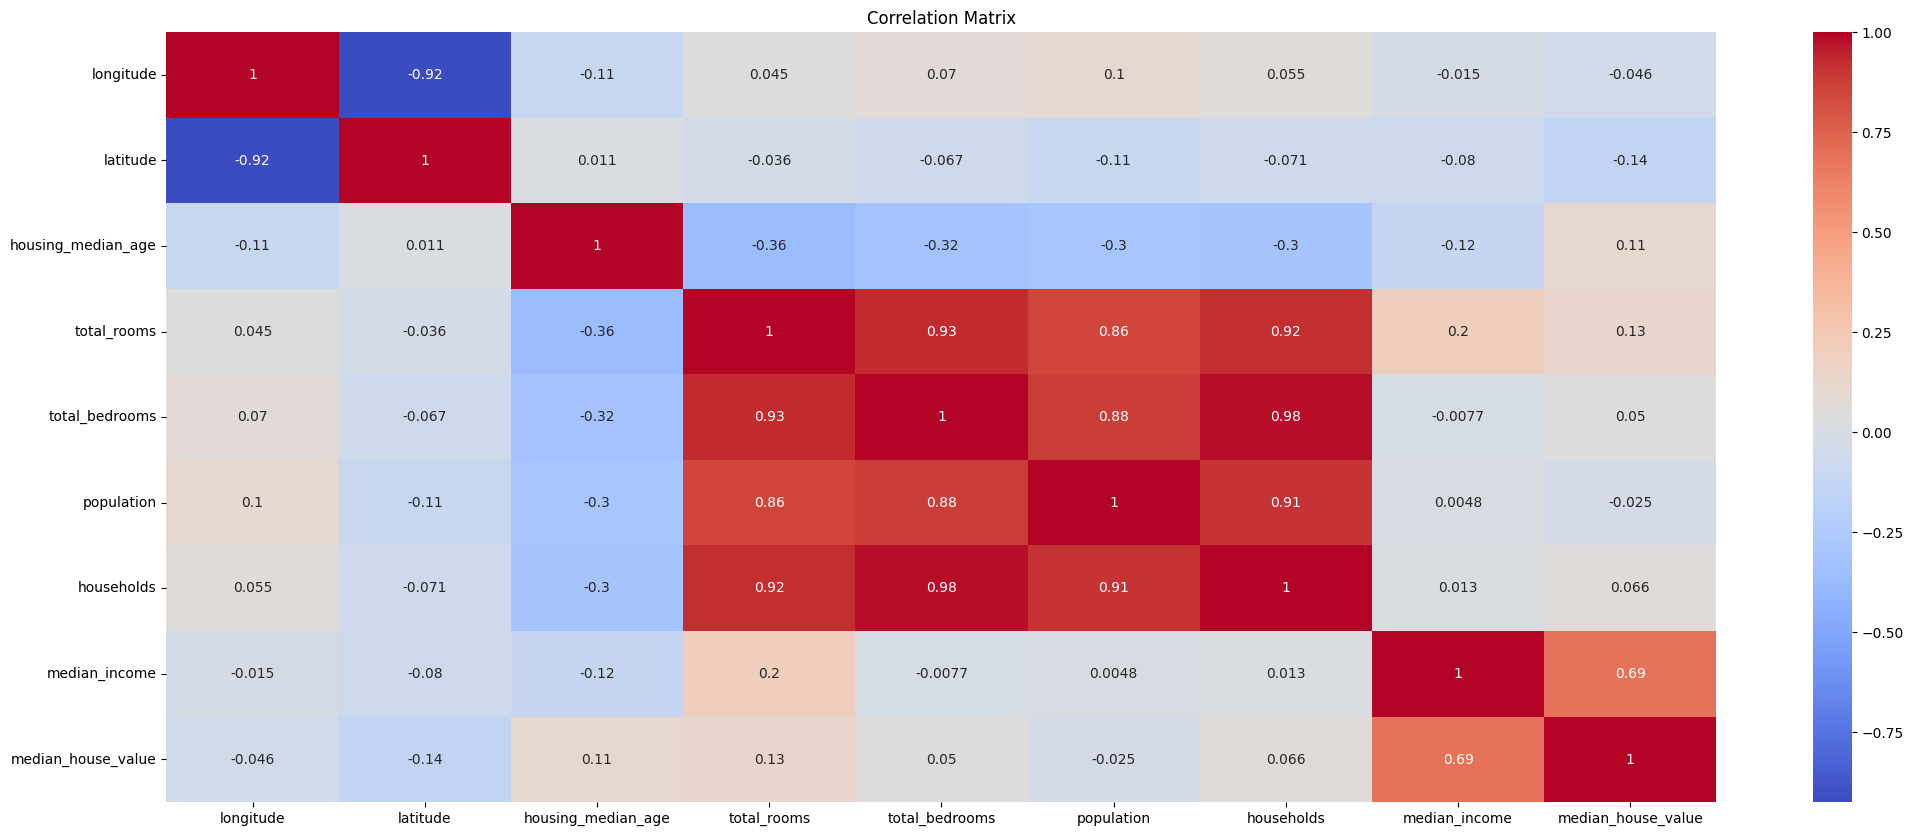

In [31]:
corr_matrix=df.corr()
fig, ax = plt.subplots(figsize=(25, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix')
plt.show()


<ipython-input-7-9ad4862edfb8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations=df.corr()["median_house_value"].sort_values(ascending=False)


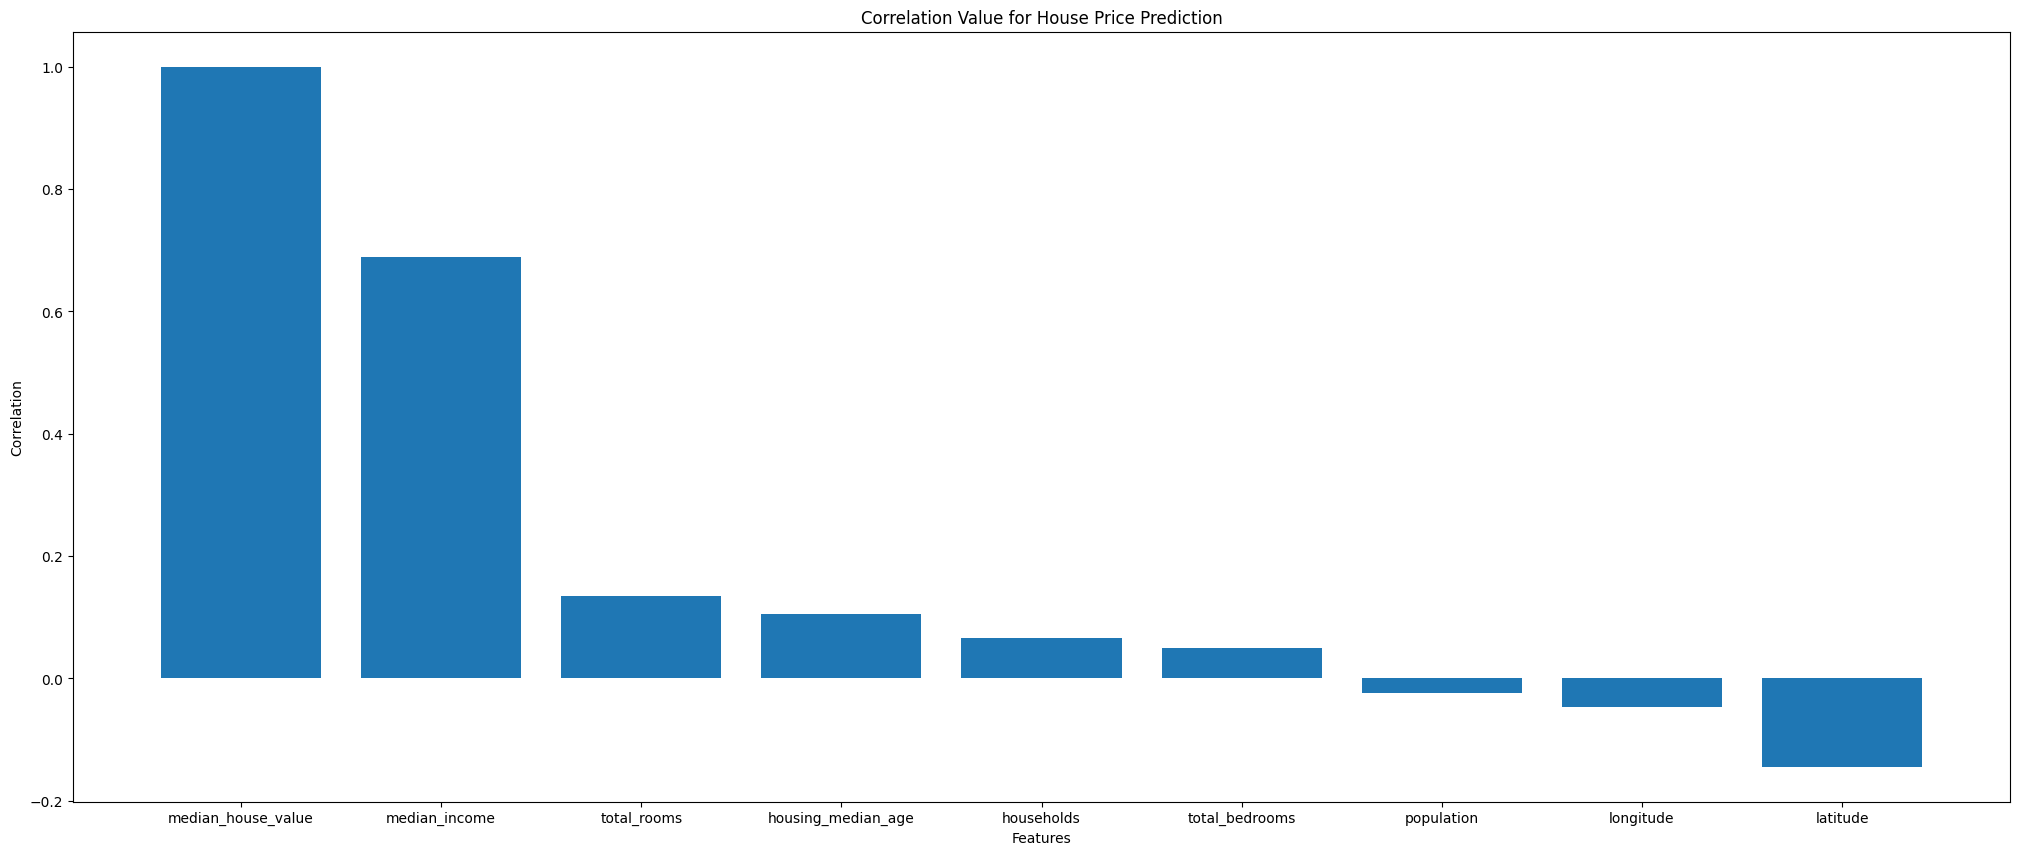

In [ ]:
correlations=df.corr()["median_house_value"].sort_values(ascending=False)

plt.figure(figsize=(25, 10)) # Set figure size to 10x6 inches
plt.bar(correlations.index, correlations)

plt.xlabel("Features")
plt.ylabel("Correlation")
plt.title("Correlation Value for House Price Prediction")
plt.show()


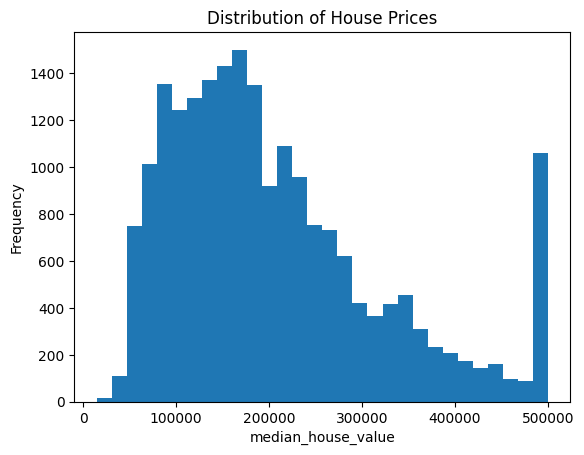

In [ ]:
 
plt.hist(df['median_house_value'], bins=30)
plt.xlabel('median_house_value')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

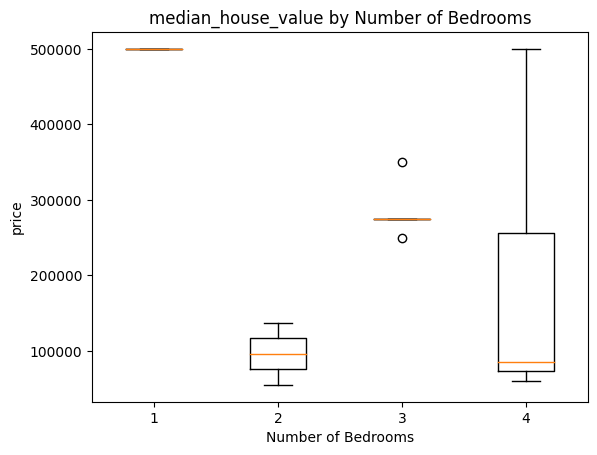

In [ ]:
# Relationship between median_house_value and the number of bedrooms
plt.boxplot([df.loc[df['total_bedrooms'] == i, 'median_house_value'] for i in range(1, 5)])
plt.xticks(range(1, 5), ['1', '2', '3', '4'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('price')
plt.title('median_house_value by Number of Bedrooms')
plt.show()


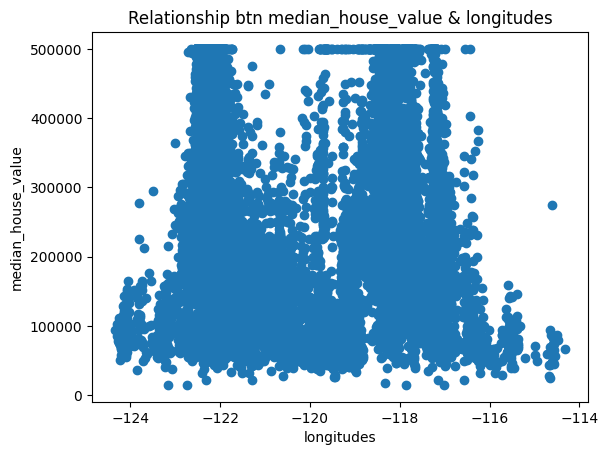

In [ ]:
# Relationship between median_house_value and longitudes
x = df['longitude']
y = df['median_house_value']
plt.scatter(x, y)Number of Bathrooms
plt.title('Relationship btn median_house_value & longitudes')
plt.xlabel('longitudes')
plt.ylabel('median_house_value')
plt.show()


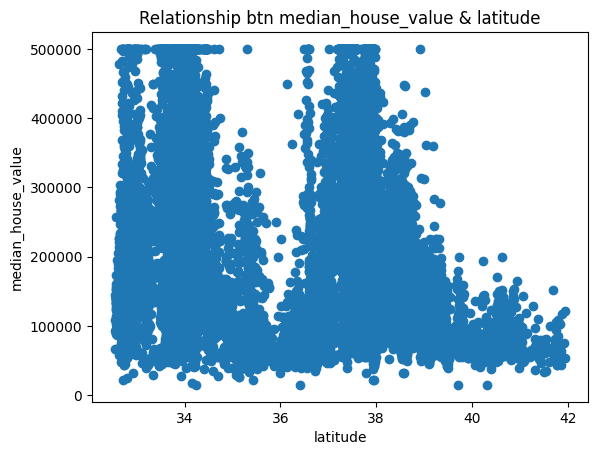

In [ ]:
# Relationship between median_house_value and the number of bathrooms
x = df['latitude']
y = df['median_house_value']
plt.scatter(x, y)
plt.title('Relationship btn median_house_value & latitude')
plt.xlabel('latitude')
plt.ylabel('median_house_value')
plt.show()


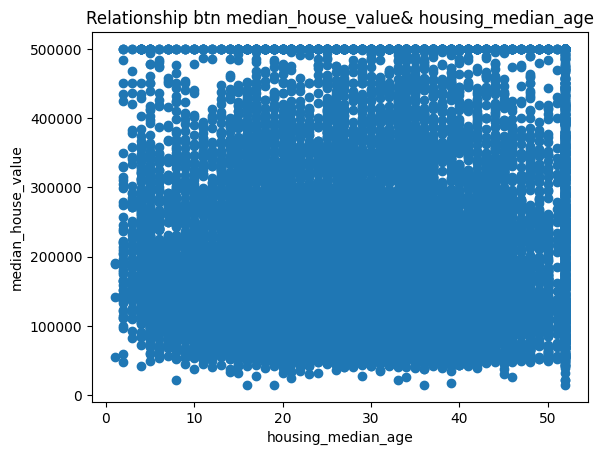

In [ ]:
# Relationship between median_house_value and housing_median_age
x = df['housing_median_age']
y = df['median_house_value']
plt.scatter(x, y)
plt.title('Relationship btn median_house_value& housing_median_age')
plt.xlabel('housing_median_age')
plt.ylabel('median_house_value')
plt.show()


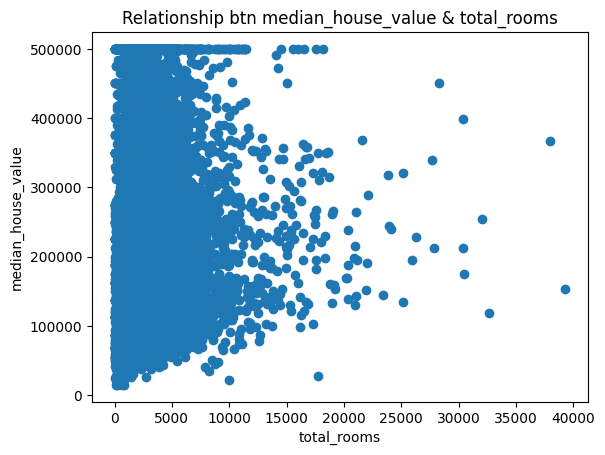

In [ ]:
# Relationship between median_house_value and total_rooms
x = df['total_rooms']
y = df['median_house_value']
plt.scatter(x, y)
plt.title('Relationship btn median_house_value & total_rooms')
plt.xlabel('total_rooms')
plt.ylabel('median_house_value')
plt.show()


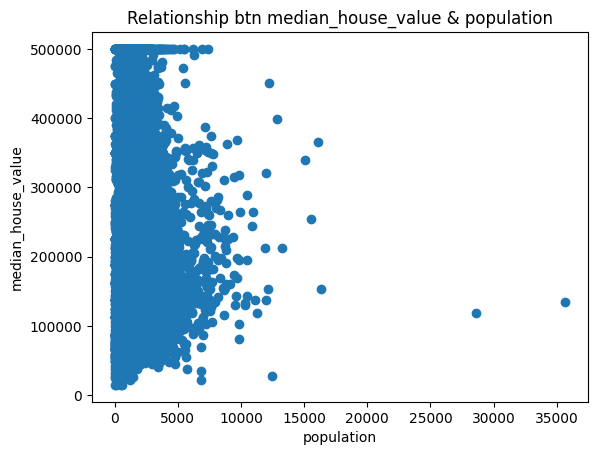

In [ ]:
# Relationship between median_house_value and population
x = df['population']
y = df['median_house_value']
plt.scatter(x, y)
plt.title('Relationship btn median_house_value & population')
plt.xlabel('population')
plt.ylabel('median_house_value')
plt.show()


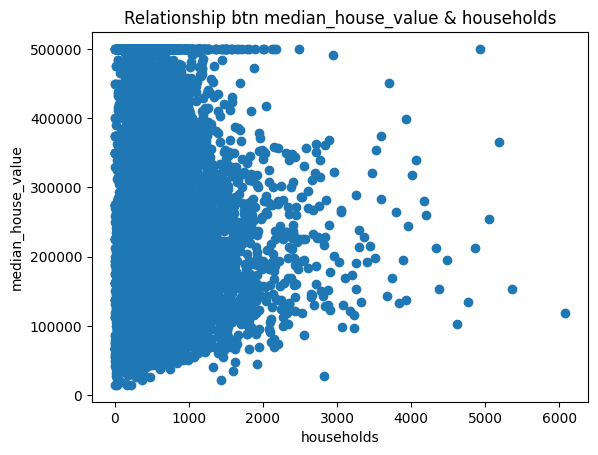

In [ ]:
# Relationship between median_house_value and households
x = df['households']
y = df['median_house_value']
plt.scatter(x, y)
plt.title('Relationship btn median_house_value & households')
plt.xlabel('households')
plt.ylabel('median_house_value')
plt.show()


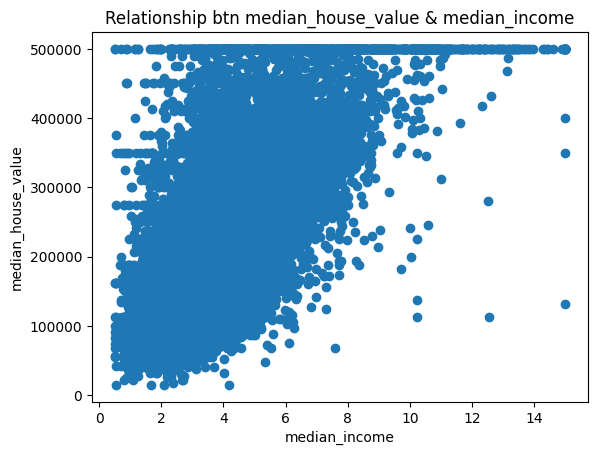

In [ ]:
# Relationship between median_house_value and median_income
x = df['median_income']
y = df['median_house_value']
plt.scatter(x, y)
plt.title('Relationship btn median_house_value & median_income')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()


In [ ]:
# Calculate the mean, standard deviation, and mode
mean = df['median_house_value'].mean()
std_dev = df['median_house_value'].std()
mode = df['median_house_value'].mode()[0]

print("Mean: ", mean)
print("Standard deviation: ", std_dev)
print("Mode: ", mode)

Mean:  206855.81690891474
Standard deviation:  115395.61587441387
Mode:  500001.0


In [ ]:
# Calculate the 25th, 50th, and 75th percentiles
p25 = np.percentile(df['median_house_value'], 25)
p50 = np.percentile(df['median_house_value'], 50)
p75 = np.percentile(df['median_house_value'], 75)

print("25th percentile: ", p25)
print("50th percentile: ", p50)
print("75th percentile: ", p75)


25th percentile:  119600.0
50th percentile:  179700.0
75th percentile:  264725.0


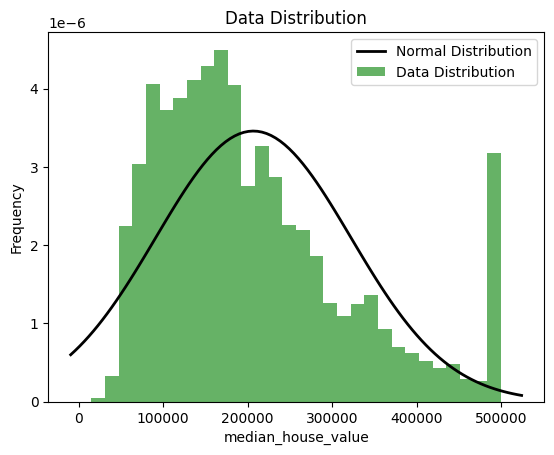

In [ ]:
# Plot the data distribution and normal data distribution
plt.hist(df['median_house_value'], bins=30, density=True, alpha=0.6, color='g')
plt.xlabel('median_house_value')
plt.ylabel('Frequency')
plt.title('Data Distribution')

# Fit a normal distribution to the data
mu, std = norm.fit(df['median_house_value'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.legend(['Normal Distribution', 'Data Distribution'])
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

# Replace missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
# Drop rows with missing values
X_dropped = X.dropna()
y_dropped = y[X.index.isin(X_dropped.index)]

# Fit a decision tree modelevaluate their performance using metrics such as mean squared error, mean absolute error, and R-squared. You can also visualize the predicted and actual house prices using a scatter plot.
X = df[['total_rooms', 'total_bedrooms', 'population']]
y = df['median_house_value']
reg_tree = DecisionTreeRegressor(random_state=0)
reg_tree.fit(X_imputed, y)

# Fit a linear regression model
reg_linear = LinearRegression().fit(X_imputed, y)

print("Decision Tree Model R^2 score: ", reg_tree.score(X_imputed, y))
print("Linear Regression Model R^2 score: ", reg_linear.score(X_imputed, y))

Decision Tree Model R^2 score:  1.0
Linear Regression Model R^2 score:  0.10098856878541096
